## 0. Import Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from xclim import sdba
from glob import glob
from shapely.geometry import mapping

import xclim
import utils


%load_ext autoreload
%autoreload 2
%reload_ext autoreload

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## 1. Open Data

In [2]:
# change if needed
bias_algo = 'QDM_era5land' # EQM or QDM
time_frame = '208101_210012' # 206101_208012 or 208101_210012 for proj or 198501_200512 for reference
season = 'DJF' # DJF or JJA

if time_frame == '208101_210012':
    time_line = 'projection'

elif time_frame == '206101_208012':
    time_line = 'projection_0'
    
elif time_frame == '198501_200512':
    time_line = 'reference'

path_general = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'
path_coeff = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/data/bias_correction'

### 1.1 Model

In [3]:
# burada yıl ayarı
year_range = np.arange(int(time_frame[0:4]), 
                       int(time_frame[7:11])+1)
yearly_paths = glob(fr'{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr_zeroed*')
yearly_paths = [expected_path for expected_path in yearly_paths 
                              if int(expected_path[-7:-3]) >= int(time_frame[0:4]) 
                              and int(expected_path[-7:-3]) <= int(time_frame[7:11])
               ]
yearly_paths

['/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2081.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2082.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2083.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2084.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2085.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2086.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2087.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2088.nc',
 '/mnt/e/Jupyter

### 1.2 Vector Tr Data

def clip_to_city(data, shapefile):
    
    clipped = data.rio.clip(shapefile.geometry.apply(mapping),
                            shapefile.crs, all_touched=True, 
                            invert=False, from_disk=True)
    
    return clipped
path_shape = fr'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/data/shapefiles/Iller_HGK_6360_Kanun_Sonrasi.shp'
shape_tr = gpd.read_file(path_shape)

In [4]:
# vector tr data
turkey_bool = xr.open_dataset(fr"{path_general}/data/TOT_PREC/cosmo/BC/vectorized_turkey_mask_from_era5land.nc")

In [5]:
wet_hour_mm = 0.1

for year, year_path in enumerate(yearly_paths):
    
    # open data
    dt_model = xr.open_dataset(year_path)
    
    print('data open')
    
    # clip to turkey
    #dt_model_clipped = clip_to_city(utils.assign_proj_to_model(dt_model.transpose('time', 'rlat', 'rlon')), shape_tr)
    dt_model_clipped = dt_model['scen'].transpose('time', 'rlat', 'rlon').where(turkey_bool==1)
    dt_model_clipped = dt_model_clipped.rename({'Tw':'TOT_PREC'})
    #dt_model_clipped = dt_model_clipped.rename({'scen':'TOT_PREC'}).copy(deep=True)
    
    #dt_model.close()
    dt_model_clipped.to_netcdf(fr"{path_general}/cosmo/yearly/BC/{time_line}/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr_clipped_{year_range[year]}.nc",
                              )
    
    print(year_path)

data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2081.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2082.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2083.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2084.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2085.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2086.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_DJF_1hr_zeroed_2087.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_M

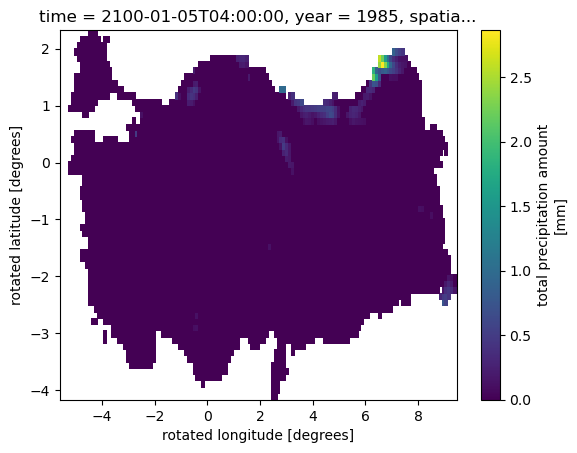

In [13]:
dt_model_clipped['TOT_PREC'][100].plot()

In [16]:
jy = xr.open_dataset(fr'{path_general}/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_JJA_1hr_merged_208101_210012.nc')['TOT_PREC']


In [17]:
jy

<xarray.DataArray 'TOT_PREC' (time: 1, rlat: 59, rlon: 137)>
array([[[9.96921e+36, 9.96921e+36, ..., 9.96921e+36, 9.96921e+36],
        [9.96921e+36, 9.96921e+36, ..., 9.96921e+36, 9.96921e+36],
        ...,
        [9.96921e+36, 9.96921e+36, ..., 9.96921e+36, 9.96921e+36],
        [9.96921e+36, 9.96921e+36, ..., 9.96921e+36, 9.96921e+36]]])
Coordinates:
  * time     (time) datetime64[ns] 1985-06-01
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float32 -5.55 -5.44 -5.33 -5.22 -5.11 ... 9.08 9.19 9.3 9.41
  * rlat     (rlat) float32 -4.11 -4.0 -3.89 -3.78 -3.67 ... 1.94 2.05 2.16 2.27
Attributes:
    standard_name:    precipitation_amount
    long_name:        total precipitation amount
    units:            mm
    grid_mapping:     spatial_ref
    cell_methods:     time: sum
    history:          [2023-02-01 16:21:28] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(name='time'), kind='...

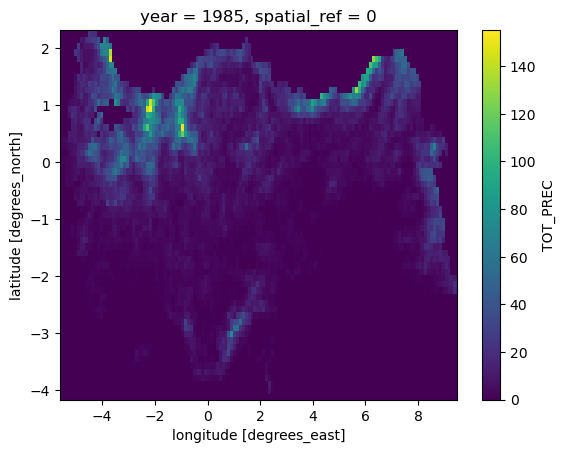

In [15]:
# 2100 JJA
dt_model_clipped['TOT_PREC'].sum(dim='time').plot()

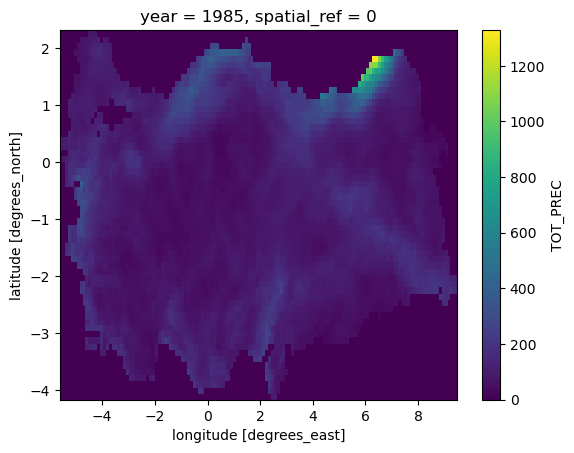

In [7]:
# 2100 DJF
dt_model_clipped['TOT_PREC'].sum(dim='time').plot()

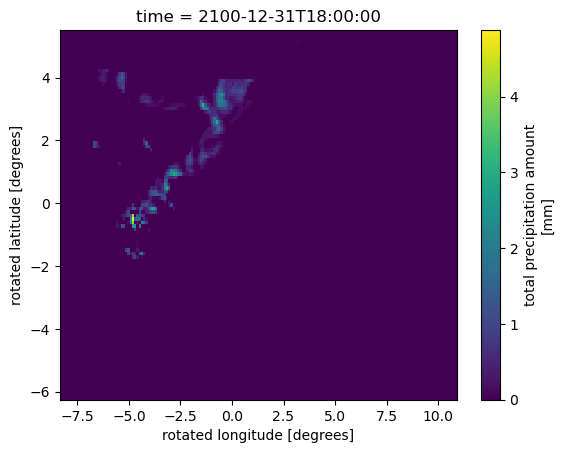

In [32]:
dt_model['scen'].transpose('time', 'rlat', 'rlon').isel(time=-1).plot()

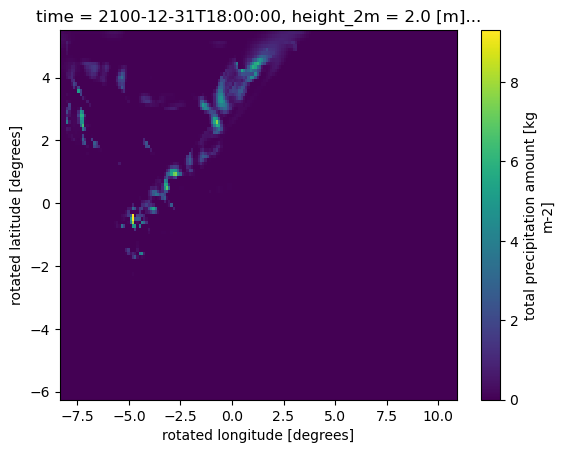

In [31]:
mm = xr.open_dataset(fr'{path_general}/data/lffd2100123118.nc')['TOT_PREC'][0]#.plot()
mm.plot()

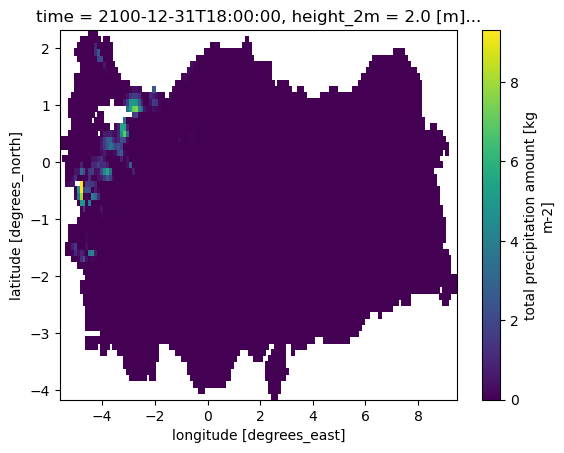

In [33]:
mm_clipped = mm.transpose('rlat', 'rlon').where(turkey_bool==1)
mm_clipped['TOT_PREC'].plot()

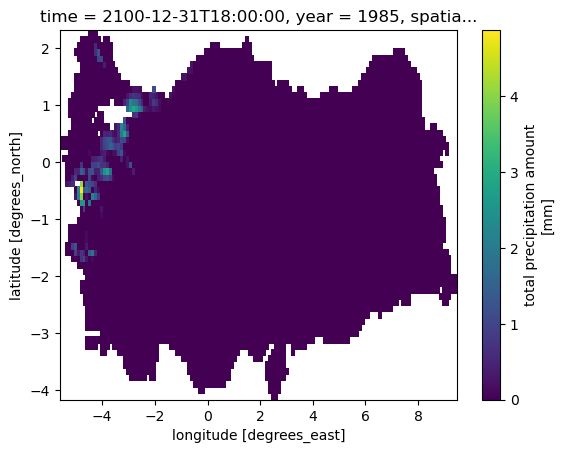

In [34]:
mm_clipped = dt_model['scen'].transpose('time', 'rlat', 'rlon').isel(time=-1).where(turkey_bool==1)
mm_clipped['TOT_PREC'].plot()

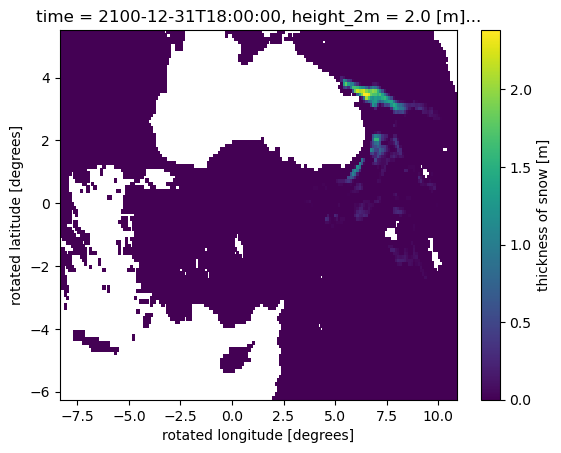

In [35]:
mm = xr.open_dataset(fr'{path_general}/data/lffd2100123118.nc')['H_SNOW'][0]#.plot()
mm.plot()

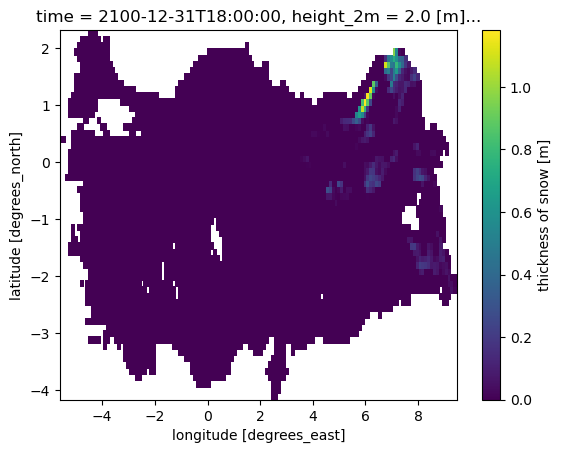

In [37]:
mm_clipped = mm.transpose('rlat', 'rlon').where(turkey_bool==1)
mm_clipped['TOT_PREC'].plot()

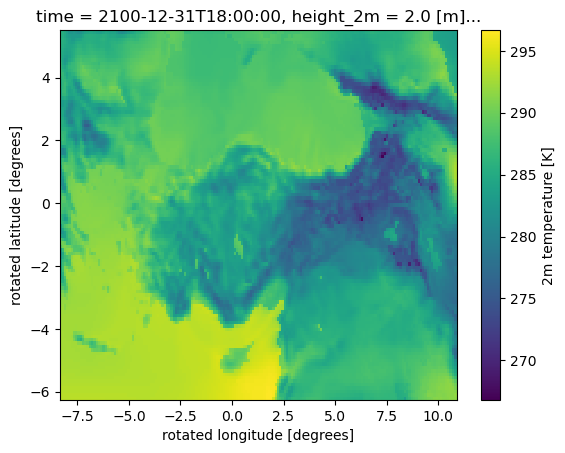

In [21]:
kk = xr.open_dataset(fr'{path_general}/data/lffd2100123118.nc')['T_2M'][0]#.plot()
kk.plot()

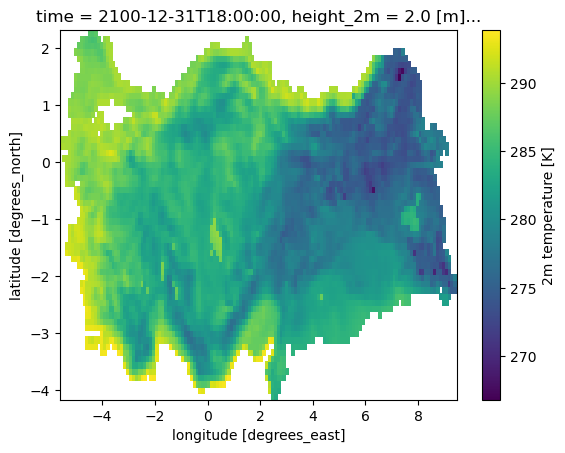

In [22]:
kk_clipped = kk.transpose('rlat', 'rlon').where(turkey_bool==1)
kk_clipped['TOT_PREC'].plot()

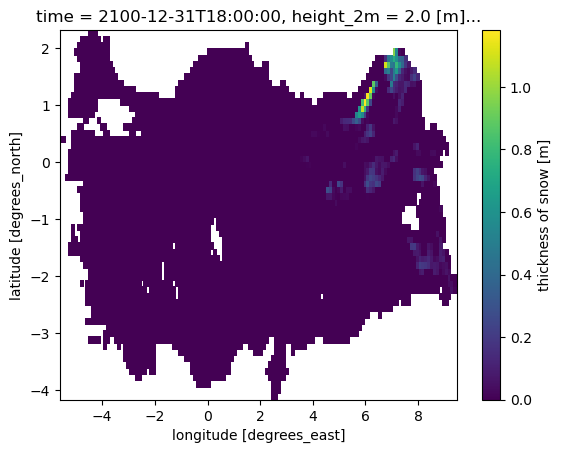

In [19]:
mm_clipped = mm.transpose('rlat', 'rlon').where(turkey_bool==1)
mm_clipped['TOT_PREC'].plot()

In [14]:

mm

<xarray.DataArray 'H_SNOW' (rlat: 107, rlon: 175)>
array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2100-12-31T18:00:00
  * rlon        (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.62 10.73 10.84
  * rlat        (rlat) float32 -6.2 -6.09 -5.98 -5.87 ... 5.13 5.24 5.35 5.46
    lon         (rlat, rlon) float32 ...
    lat         (rlat, rlon) float32 ...
    height_2m   float32 ...
    height_10m  float32 ...
    height_toa  float32 ...
Attributes:
    standard_name:  surface_snow_thickness
    long_name:      thickness of snow
    units:          m
    grid_mapping:   rotated_pole
    cell_methods:   time: point

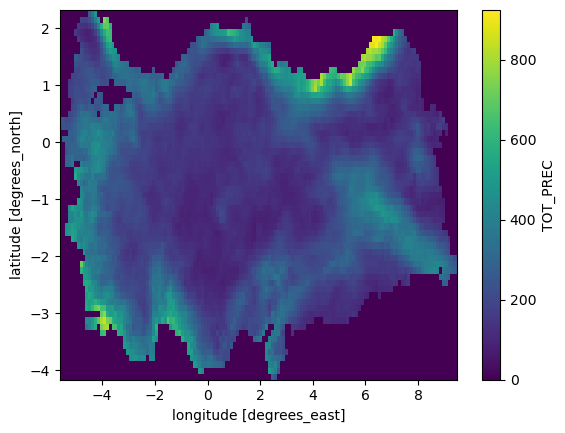

In [11]:
dt_model_clipped['TOT_PREC'].sum(dim='time').plot()